In [1]:
import pandas as pd

In [163]:
df1 = pd.read_csv('adult_with_headers (1).csv')
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 1. Data Exploration and Preprocessing:

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [124]:
# summary statistics

df1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [125]:
# Finding missing values.

df1.isnull().sum() # Founds that no missing values are existed.

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [126]:
# Applying scaling techniques.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mms = MinMaxScaler()

In [128]:
cols = df1.select_dtypes(exclude = 'number').columns
df1_num = df1.drop(columns = cols, axis = 1)

In [129]:
# StandardScaler

standard_Scaler = ss.fit_transform(df1_num)
standard_Scaler = pd.DataFrame(standard_Scaler)
standard_Scaler.columns = list(df1_num)
standard_Scaler.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [130]:
# MinMaxScaler

minmax_Scaler = mms.fit_transform(df1_num)
minmax_Scaler = pd.DataFrame(minmax_Scaler)
minmax_Scaler.columns = list(df1_num)
minmax_Scaler.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [131]:
# Discuss the scenarios where each scaling technique is preferred and why.

In [132]:
'''
StandardScaler :-
When features vary widely in range or have outliers (When to use)
Centers data (mean=0, std=1) so large-range features don’t dominate (Why to use)

MinMaxScaler :-
When you need all values in 0–1 range (When to use)
Preserves shape of data, easy for gradient-based models (Why to use)
'''

'\nStandardScaler :-\nWhen features vary widely in range or have outliers (When to use)\nCenters data (mean=0, std=1) so large-range features don’t dominate (Why to use)\n\nMinMaxScaler :-\nWhen you need all values in 0–1 range (When to use)\nPreserves shape of data, easy for gradient-based models (Why to use)\n'

<!-- 2. Encoding Techniques: -->

# 2. Encoding Techniques:

In [173]:
cat_cols = df1.select_dtypes(include = 'object').columns
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [174]:
df1[cat_cols].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [190]:
# OneHot encoder

few_cat = []
for cols in cat_cols:
    if df1[cols].nunique() <= 5:
        few_cat.append(cols)
few_cat

['race', 'sex', 'income']

In [201]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop = 'first')

df_one = onehot.fit_transform(df1[few_cat]).toarray()
df_one = pd.DataFrame(df_one, columns=encoder.get_feature_names_out(few_cat))
df_one.head()

,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [136]:
# Label encoder.

many_cat = []
for cols in cat_cols:
    if df1[cols].nunique() > 5:
        many_cat.append(cols)
many_cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [208]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in many_cat:
    df1[col] = label.fit_transform(df1[col])
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K


In [ ]:
# Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [ ]:
'''
One-Hot Encoding :-
Converts each category into a new binary (0/1) column — one column per category.

pros :-
Doesn't assign any numeric order, so perfect for nominal data
The model won't assume a ranking between categories.
cons :-
Slower training for large datasets.
Many binary columns can make data harder to read.

Label Encoding :-

pros :-
Easy to implement with minimal memory usage.
cons :-
Implies ordinal relationship, which can mislead linear models.
Encoded values lose categorical meaning.
'''

# 3. Feature Engineering:

In [210]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [211]:
# Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [212]:
# Feature 1 :-

df1['Work_Hours_Per_Age'] = df1['hours_per_week'] / df1['age']

In [ ]:
# Rationale:
'''
-> This feature represents how much a person works relative to their age.
-> Younger individuals may work longer hours, while older individuals might work less.
-> It helps the model capture patterns related to work intensity and age productivity, which can affect income level.
'''

In [213]:
# Feature 2 :-

df['Capital_Gain_Loss_Ratio'] = (df['capital_gain'] + 1) / (df['capital_loss'] + 1)

In [ ]:
# Rationale:
'''
-> This ratio shows financial stability or investment success.
-> People with consistently high gains and fewer losses are likely to earn more than those with frequent losses.
-> Adding +1 prevents division by zero when both values are zero.
'''

In [214]:
# Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

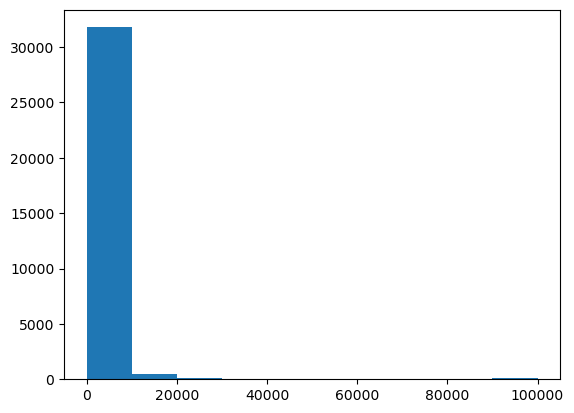

In [217]:
import matplotlib.pyplot as plt

plt.hist(df1['capital_gain'])
plt.show()

In [215]:
import numpy as np

df['capital_gain_log'] = np.log1p(df['capital_gain'])  # log(1 + x)

In [ ]:
# Justification:
'''
The log transformation makes capital_gain more symmetric, improving model interpretability.
It helps algorithms like Logistic Regression or Random Forests to perform better by stabilizing variance and reducing the dominance of extreme values.
'''